In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly as py
%matplotlib inline
cf.go_offline()

In [2]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
py.offline.init_notebook_mode(connected=True)
init_notebook_mode(connected=True)

In [3]:
Train_data = pd.read_csv('train.csv')

In [4]:
Train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


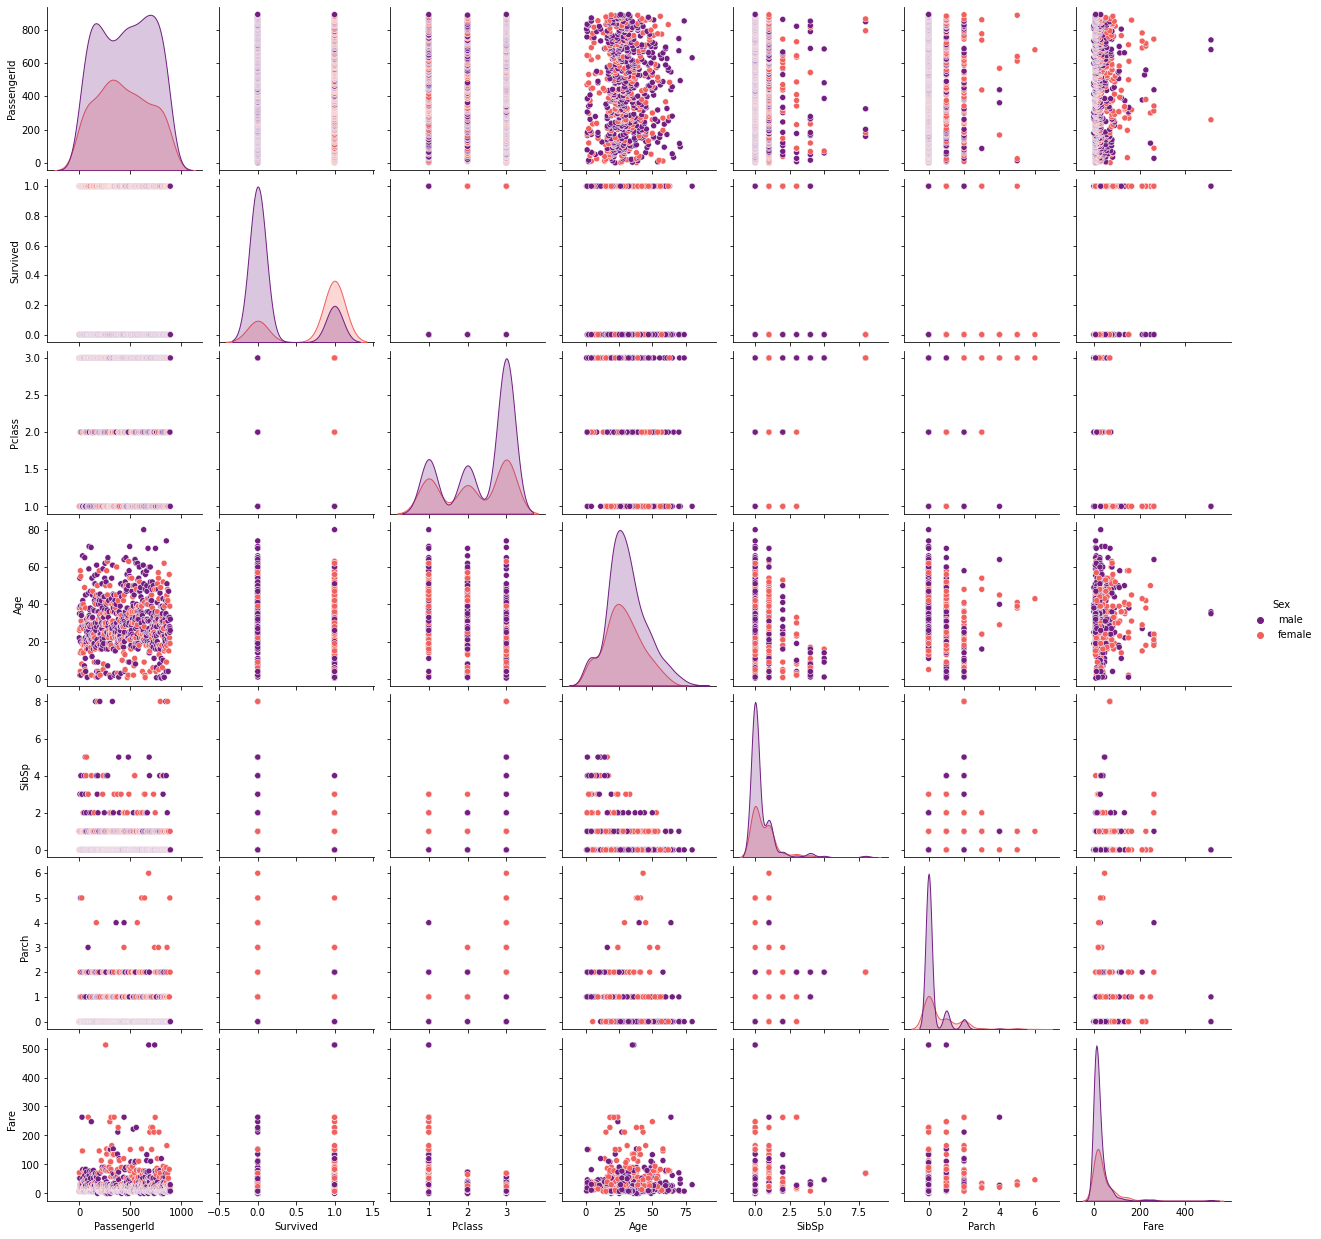

In [5]:
sns.pairplot(Train_data,hue='Sex',palette='magma')

<AxesSubplot:>

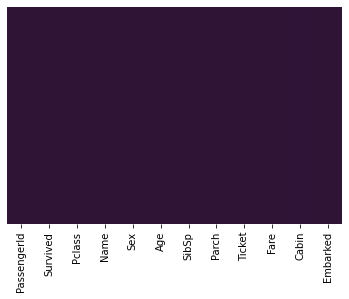

In [6]:
sns.heatmap(Train_data.isnull(),yticklabels=False,cbar=False,cmap= 'twilight_shifted_r')

In [7]:
#def male_female_child(passenger):
    # Take the Age and Sex
 #   age,Sex = passenger
    # Compare the age, otherwise leave the sex
  #  if age < 16:
    #    return 'child'
  #  else:
  ##      return Sex

In [8]:
#Train_data['Person']= Train_data[['Age','Sex']].apply(male_female_child, axis=1)

In [9]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

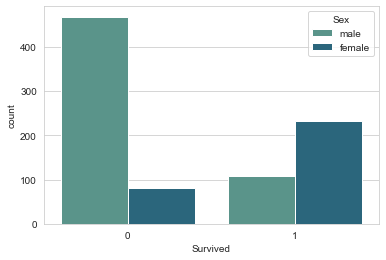

In [10]:
sns.countplot(x='Survived',hue='Sex',data=Train_data,palette='crest')

<AxesSubplot:xlabel='Survived', ylabel='count'>

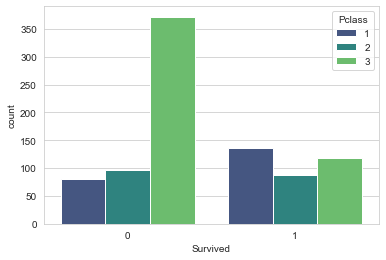

In [11]:
sns.countplot(x='Survived',hue='Pclass',data=Train_data,palette='viridis')

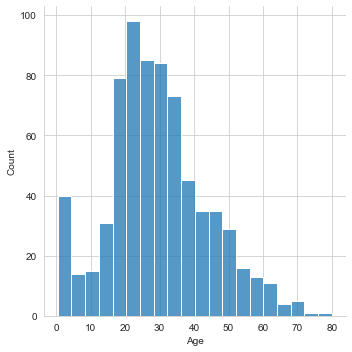

In [12]:
sns.displot(Train_data['Age'].dropna(),kde=False,bins=20)

<AxesSubplot:ylabel='Frequency'>

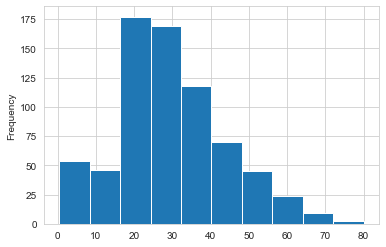

In [13]:
Train_data['Age'].plot.hist()

<AxesSubplot:>

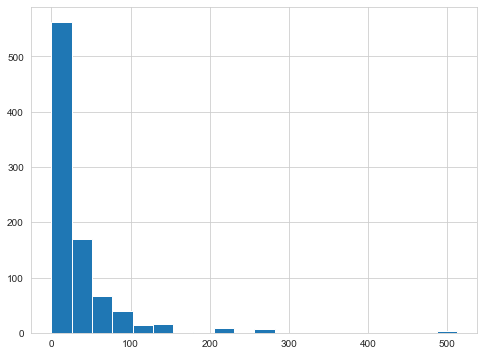

In [14]:
Train_data['Fare'].hist(bins=20,figsize=(8,6))

In [15]:
Train_data['Fare'].iplot(kind='hist',bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

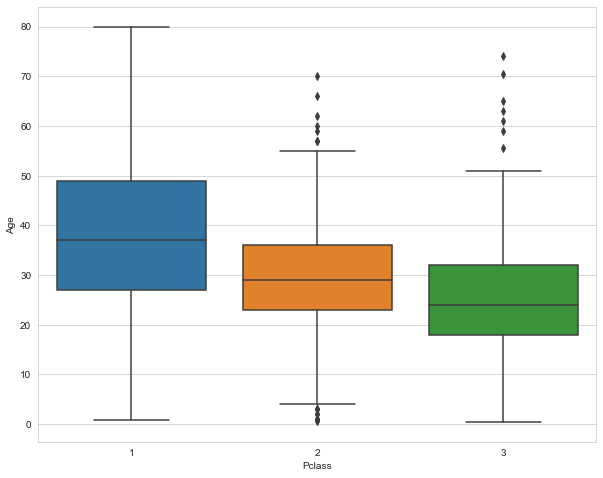

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass',y='Age',data=Train_data)

In [17]:
Train_data.drop('Cabin',axis=1,inplace=True)

In [18]:
Train_data.dropna(inplace=True)

In [19]:
Train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
sex = pd.get_dummies(Train_data['Sex'],drop_first=True)
embark = pd.get_dummies(Train_data['Embarked'],drop_first=True)

In [21]:
#merge 
Train_data = pd.concat([Train_data,sex,embark],axis=1)

In [22]:
Train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [23]:
Train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [24]:
Train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [25]:
Train_data.drop('PassengerId',axis=1,inplace=True)

In [26]:
Train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [27]:
x = Train_data.drop('Survived',axis=1)
y = Train_data['Survived']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33,random_state=1)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
LogReg = LogisticRegression()

In [32]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

#X, y = make_classification(random_state=42)
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
scaler
StandardScaler()
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
#Pipeline(steps=[('standardscaler', StandardScaler()),
                #('logisticregression', LogisticRegression())])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [33]:
LogReg.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred =LogReg.predict(X_test)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test,y_pred)

array([[15,  0],
       [ 0, 10]], dtype=int64)

In [39]:
gen = pd.read_csv('gender_submission.csv')

In [40]:
gen.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [41]:
test = pd.read_csv('test.csv')

In [42]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
Datasets = [Train_data,gen]

In [44]:
Data = pd.concat(Datasets)

In [45]:
Data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,PassengerId
0,0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,NaN
1,1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,NaN
2,1,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,NaN
3,1,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,NaN
4,0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,NaN


In [46]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1130 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     1130 non-null   int64  
 1   Pclass       712 non-null    float64
 2   Age          712 non-null    float64
 3   SibSp        712 non-null    float64
 4   Parch        712 non-null    float64
 5   Fare         712 non-null    float64
 6   male         712 non-null    float64
 7   Q            712 non-null    float64
 8   S            712 non-null    float64
 9   PassengerId  418 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 97.1 KB


In [47]:
Data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,PassengerId
count,1130.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,418.000000
mean,0.389381,2.240169,29.642093,0.514045,0.432584,34.567251,0.636236,0.039326,0.778090,1100.500000
std,0.487826,0.836854,14.492933,0.930692,0.854181,52.938648,0.481420,0.194506,0.415823,120.810458
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,892.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000,1.000000,996.250000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850,1.000000,0.000000,1.000000,1100.500000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1204.750000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1309.000000


In [48]:
Data.isnull()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,PassengerId
0,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
413,False,True,True,True,True,True,True,True,True,False
414,False,True,True,True,True,True,True,True,True,False
415,False,True,True,True,True,True,True,True,True,False
416,False,True,True,True,True,True,True,True,True,False


In [49]:
Data.groupby(['Pclass']).Survived.sum()

Pclass
1.0    120
2.0     83
3.0     85
Name: Survived, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

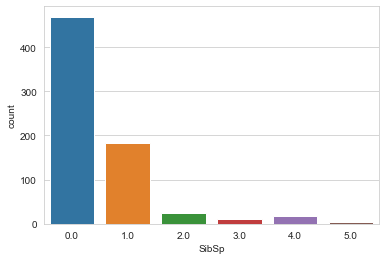

In [50]:
sns.countplot(x='SibSp',data=Data)

C:\Users\ancep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age'>

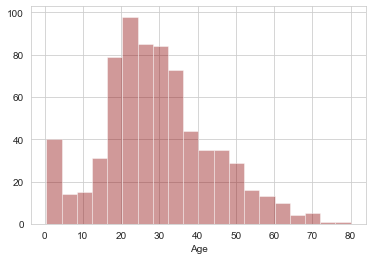

In [51]:
sns.distplot(Data['Age'].dropna(),kde=False,color='darkred')

<AxesSubplot:xlabel='Age', ylabel='Count'>

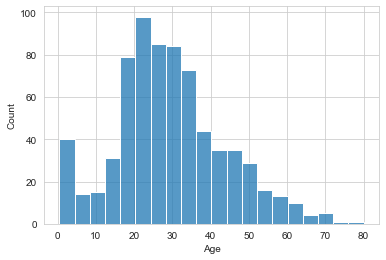

In [52]:
sns.histplot(Data['Age'])

In [53]:
Data.head(-5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,PassengerId
0,0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,NaN
1,1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,NaN
2,1,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,NaN
3,1,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,NaN
4,0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
408,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1300.0
409,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1301.0
410,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1302.0
411,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1303.0


<AxesSubplot:>

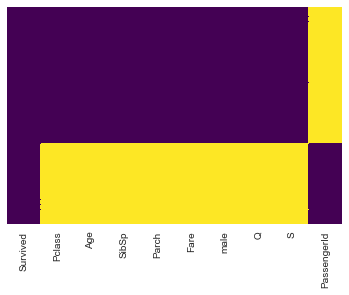

In [54]:
sns.heatmap(Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [55]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [56]:
Data['Age'] = Data[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

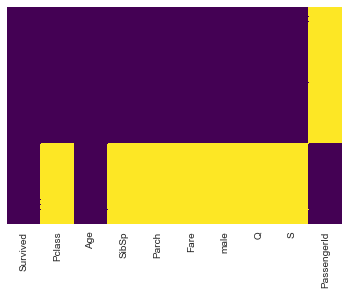

In [57]:
sns.heatmap(Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [58]:
Data['Pclass'] = Data[['Pclass','Parch']].apply(impute_age,axis=1)

In [59]:
def impute_age(cols):
    Pclass = cols[0]
    Parch = cols[1]
    
    if pd.isnull(Pclass):

        if Parch == 1:
            return 37

        elif Parch == 2:
            return 29

        else:
            return 24

    else:
        return Pclass

In [60]:
Data['Pclass'] = Data[['Pclass','Parch']].apply(impute_age,axis=1)

<AxesSubplot:>

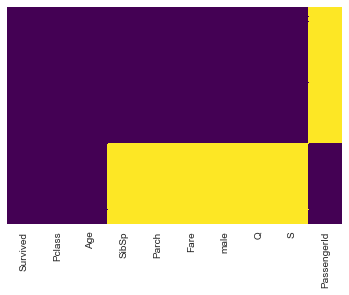

In [61]:
sns.heatmap(Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [62]:
def impute_age(cols):
    Parch = cols[0]
    SibSp = cols[1]
    
    if pd.isnull(Parch):

        if SibSp == 1:
            return 37

        elif SibSp == 2:
            return 29

        else:
            return 24

    else:
        return Parch

In [63]:
Data['Parch'] = Data[['Parch','SibSp']].apply(impute_age,axis=1)

In [64]:
def impute_age(cols):
    SibSp = cols[0]
    Q = cols[1]
    
    if pd.isnull(SibSp):

        if Q == 1:
            return 37

        elif Q == 2:
            return 29

        else:
            return 24

    else:
        return SibSp

In [65]:
Data['SibSp'] = Data[['SibSp','Q']].apply(impute_age,axis=1)

In [66]:
def impute_age(cols):
    Fare = cols[0]
    Q = cols[1]
    
    if pd.isnull(Fare):

        if Q == 1:
            return 37

        elif Q == 2:
            return 29

        else:
            return 24

    else:
        return Fare

In [67]:
Data['Fare'] = Data[['Fare','Q']].apply(impute_age,axis=1)

In [68]:
def impute_age(cols):
    male = cols[0]
    Q = cols[1]
    
    if pd.isnull(male):

        if Q == 1:
            return 37

        elif Q == 2:
            return 29

        else:
            return 24

    else:
        return male

In [69]:
Data['male'] = Data[['male','Q']].apply(impute_age,axis=1)

In [70]:
def impute_age(cols):
    S = cols[0]
    Q = cols[1]
    
    if pd.isnull(S):

        if Q == 1:
            return 37

        elif Q == 2:
            return 29

        else:
            return 24

    else:
        return S

In [71]:
Data['S'] = Data[['S','Q']].apply(impute_age,axis=1)

In [72]:
def impute_age(cols):
    Q = cols[0]
    S = cols[1]
    
    if pd.isnull(Q):

        if S == 1:
            return 37

        elif S == 2:
            return 29

        else:
            return 24

    else:
        return Q

In [73]:
Data['Q'] = Data[['Q','S']].apply(impute_age,axis=1)

<AxesSubplot:>

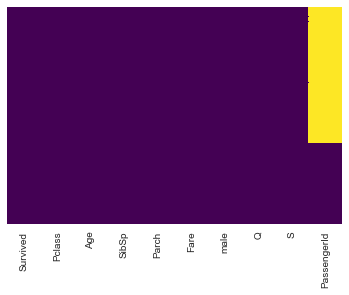

In [74]:
sns.heatmap(Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [75]:
def impute_age(cols):
    PassengerId = cols[0]
    S = cols[1]
    
    if pd.isnull(PassengerId):

        if S == 1:
            return 37

        elif S == 2:
            return 29

        else:
            return 24

    else:
        return PassengerId

In [76]:
Data['PassengerId'] = Data[['PassengerId','S']].apply(impute_age,axis=1)

<AxesSubplot:>

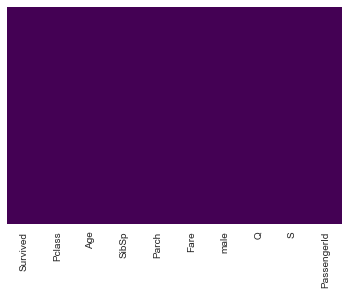

In [77]:
sns.heatmap(Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

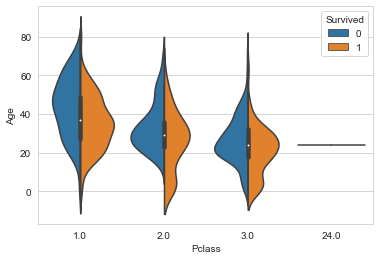

In [78]:
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=Data,split=True)

Text(0.5, 0, 'Age')

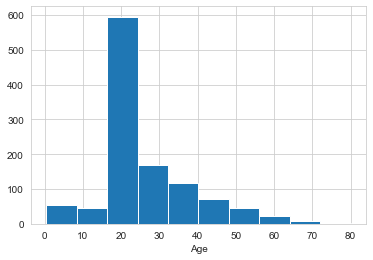

In [79]:
sns.set_style('whitegrid')
Data['Age'].hist(bins=10)
plt.xlabel('Age')

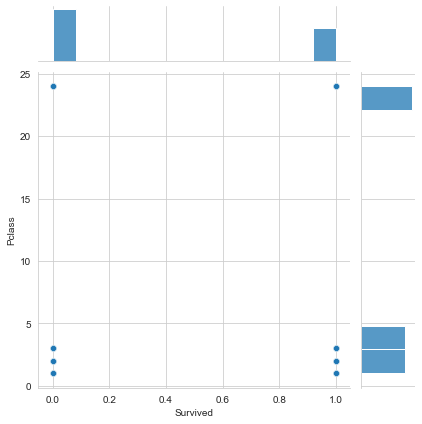

In [80]:
sns.jointplot(x='Survived',y='Pclass',data=Data)

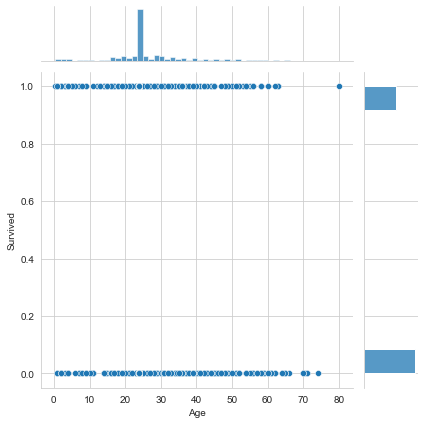

In [81]:
sns.jointplot(x='Age',y='Survived',data=Data)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
Data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S',
       'PassengerId'],
      dtype='object')

In [84]:
X = Data[['Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare', 'male','Q', 'S',]]
y = Data[ 'PassengerId']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [88]:
logmodel = LogisticRegression(max_iter = 2000)
cv = cross_val_score(logmodel,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

C:\Users\ancep\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



[0.625      0.625      0.62251656 0.62251656 0.62251656]
0.6235099337748344


In [89]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

C:\Users\ancep\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



[0.46710526 0.46710526 0.47019868 0.47682119 0.50331126]
0.47690833042872083


In [90]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

C:\Users\ancep\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



[0.49342105 0.48684211 0.49006623 0.49006623 0.47682119]
0.4874433600557685


In [91]:
survivors = Data.groupby('Survived')

In [92]:
survivors.size

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002C91D0BFB20>>

In [93]:
# Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

C:\Users\ancep\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



62.62 %


In [94]:
#rf = RandomForestClassifier(n_estimators=100)
rfc = RandomForestClassifier(n_estimators=200)
scores = cross_val_score(rfc, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

C:\Users\ancep\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.



Scores: [0.63157895 0.63157895 0.61842105 0.61842105 0.61842105 0.61842105
 0.61842105 0.62666667 0.62666667 0.62666667]
Mean: 0.6235263157894737
Standard Deviation: 0.005381391280560869


In [95]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 50   0   0 ...   0   0   0]
 [  0 190   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   1 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   1 ...   0   0   0]]


              precision    recall  f1-score   support

        24.0       1.00      1.00      1.00        50
        37.0       1.00      1.00      1.00       190
       892.0       0.00      0.00      0.00         0
       893.0       0.00      0.00      0.00         0
       894.0       0.00      0.00      0.00         1
       895.0       0.00      0.00      0.00         1
       896.0       0.00      0.00      0.00         1
       901.0       0.00      0.00      0.00         1
       902.0       0.00      0.00      0.00         1
       903.0       0.00      0.00      0.00         1
       906.0       0.00      0.00      0.00         1
       907.0       0.00      0.00      0.00         1
       912.0       0.00      0.00      0.00         1
       918.0       0.00      0.00      0.00      

C:\Users\ancep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ancep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\ancep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ancep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` param

In [98]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 50   0   0 ...   0   0   0]
 [  0 190   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   1 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   1 ...   0   0   0]]


              precision    recall  f1-score   support

        24.0       1.00      1.00      1.00        50
        37.0       1.00      1.00      1.00       190
       892.0       0.00      0.00      0.00         0
       893.0       0.00      0.00      0.00         0
       894.0       0.00      0.00      0.00         1
       895.0       0.00      0.00      0.00         1
       896.0       0.00      0.00      0.00         1
       901.0       0.00      0.00      0.00         1
       902.0       0.00      0.00      0.00         1
       903.0       0.00      0.00      0.00         1
       906.0       0.00      0.00      0.00         1
       907.0       0.00      0.00      0.00         1
       912.0       0.00      0.00      0.00         1
       918.0       0.00      0.00      0.00      

C:\Users\ancep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ancep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\ancep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ancep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` param

In [97]:
Data['Survived'].value_counts()

0    690
1    440
Name: Survived, dtype: int64

We started with the data exploration where we got a feeling for the dataset, checked about missing data and learned which features are important. During this process we used seaborn and matplotlib to do the visualizations. During the data preprocessing part, we computed missing values, converted features into numeric ones, grouped values into categories and created a few new features. Afterwards we started training 8 different machine learning models, picked one of them (random forest) and applied cross validation on it. Then we discussed how random forest works, took a look at the importance it assigns to the different features and tuned it’s performace through optimizing it’s hyperparameter values. Lastly, we looked at it’s confusion matrix and computed the models precision, recall and f-score.


Therefore the accuracy of the models are:

Logistic regression: 62.6%
K Nearest Neighbour: 49.4%
SVC: 62.3%
Random Forest: 62%    
As you can see we get decent accuracy with all our models, but the best one is SVC. And voila, just like that you’ve completed your first data science project! Though there is so much more one can do to get better results, this is more than enough to help you get started and see how you think like a data scientist. I hope this walkthrough helped you, I had a great time doing the project myself and hope you enjoy it too. Cheers!!